In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
df = pd.read_csv("BankCrediTCard.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             30000 non-null  int64  
 1   Credit_Amount           30000 non-null  float64
 2   Gender                  30000 non-null  int64  
 3   Academic_Qualification  30000 non-null  int64  
 4   Marital                 30000 non-null  int64  
 5   Age_Years               30000 non-null  int64  
 6   Repayment_Status_Jan    30000 non-null  int64  
 7   Repayment_Status_Feb    30000 non-null  int64  
 8   Repayment_Status_March  30000 non-null  int64  
 9   Repayment_Status_April  30000 non-null  int64  
 10  Repayment_Status_May    30000 non-null  int64  
 11  Repayment_Status_June   30000 non-null  int64  
 12  Jan_Bill_Amount         30000 non-null  float64
 13  Feb_Bill_Amount         30000 non-null  float64
 14  March_Bill_Amount       30000 non-null

In [4]:
df.isna().sum()

Customer ID               0
Credit_Amount             0
Gender                    0
Academic_Qualification    0
Marital                   0
Age_Years                 0
Repayment_Status_Jan      0
Repayment_Status_Feb      0
Repayment_Status_March    0
Repayment_Status_April    0
Repayment_Status_May      0
Repayment_Status_June     0
Jan_Bill_Amount           0
Feb_Bill_Amount           0
March_Bill_Amount         0
April_Bill_Amount         0
May_Bill_Amount           0
June_Bill_Amount          0
Previous_Payment_Jan      0
Previous_Payment_Feb      0
Previous_Payment_March    0
Previous_Payment_April    0
Previous_Payment_May      0
Previous_Payment_June     0
Default_Payment           0
dtype: int64

In [5]:
df.describe()

,Customer ID,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,...,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June,Default_Payment
count,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000
mean,15000.500000,1.929173e+05,1.603733,1.855933,1.551867,35.485500,0.355200,0.319300,0.302967,0.25670,...,55122.263933,39939.618800,38506.051533,6285.653867,7.466544e+03,5836.140567,5127.687433,5261.19120,5215.502567,0.221200
std,8660.398374,1.322888e+05,0.489129,0.794397,0.521970,9.217904,0.746984,0.796012,0.781792,0.74388,...,83577.329356,60373.934792,59104.280171,18944.920299,3.467950e+04,20696.306703,17103.762740,16989.50685,17777.465775,0.415062
min,1.000000,2.000000e+04,1.000000,1.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.00000,...,-270000.000000,-81334.000000,-338603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000
25%,7500.750000,5.000000e+04,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.00000,...,2671.500000,1763.000000,1256.000000,1000.000000,7.700000e+02,550.000000,333.000000,310.00000,117.750000,0.000000
50%,15000.500000,2.200000e+05,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.00000,...,25629.000000,18043.000000,17071.000000,3000.000000,2.542000e+03,1900.000000,1500.000000,1539.00000,1500.000000,0.000000
75%,22500.250000,2.700000e+05,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.00000,...,54508.500000,50190.500000,48655.250000,6000.000000,5.000000e+03,5500.000000,4013.250000,5000.00000,4000.000000,0.000000
max,30000.000000,2.000000e+06,2.000000,6.000000,3.000000,79.000000,6.000000,6.000000,6.000000,6.00000,...,992596.000000,827171.000000,861664.000000,973663.000000,2.674259e+06,999055.000000,538897.000000,536539.00000,528666.000000,1.000000


In [6]:
df.head()

,Customer ID,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,...,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June,Default_Payment
0,1,20000.0,2,2,1,24,2,2,0,0,...,0.0,0.0,0.0,0.0,679.0,0.0,0.0,0.0,0.0,1
1,2,220000.0,2,2,2,26,0,2,0,0,...,3272.0,3455.0,3261.0,0.0,2000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,24332.0,14848.0,15548.0,1619.0,2500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,29324.0,28858.0,28547.0,3000.0,2029.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,...,20940.0,18146.0,18131.0,3000.0,36672.0,10000.0,9000.0,689.0,679.0,0


c:\users\agraw\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
c:\users\agraw\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
c:\users\agraw\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
c:\users\agraw\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
c:\users\agraw\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data

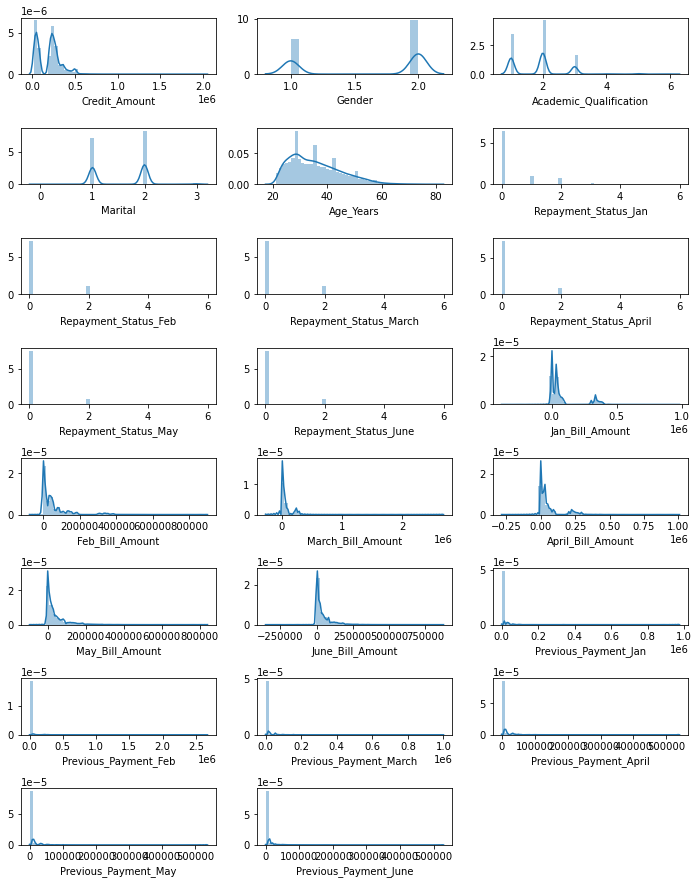

In [7]:

plt.figure(figsize=(10,15))
plotnumber = 1

for col in df.columns[1:-1]:
    if plotnumber < 24:
        plt.subplot(10,3,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col)
    plotnumber +=1
plt.tight_layout()

esme kuch columns drop krne ka man kiya to kr rhe ..... jaise ki id, marital, academic .... kyunki ye relevant features nhi hai 

par maine dekha ki enko drop krne se koi faayda nhi .... par hta diya maine 

In [8]:
df.drop(['Customer ID', 'Age_Years', 'Gender', 'Marital', 'Academic_Qualification'], axis=1, inplace=True)

ab firse graph plot krke dekhte h

c:\users\agraw\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
c:\users\agraw\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
c:\users\agraw\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
c:\users\agraw\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
c:\users\agraw\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data

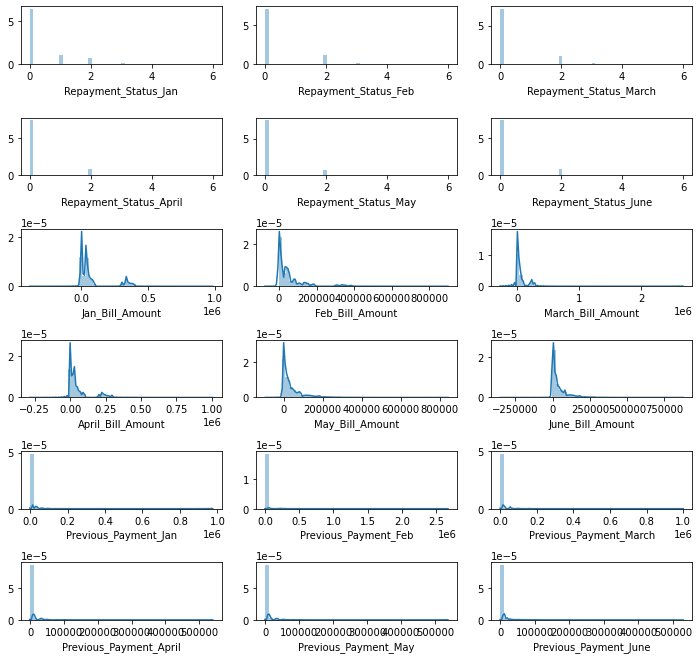

In [9]:

plt.figure(figsize=(10,15))
plotnumber = 1

for col in df.columns[1:-1]:
    if plotnumber < 19:
        plt.subplot(10,3,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col)
    plotnumber +=1
plt.tight_layout()

In [10]:
df['Default_Payment'].value_counts()

0    23364
1     6636
Name: Default_Payment, dtype: int64

In [11]:
df.head()

,Credit_Amount,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,Repayment_Status_May,Repayment_Status_June,Jan_Bill_Amount,Feb_Bill_Amount,March_Bill_Amount,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June,Default_Payment
0,20000.0,2,2,0,0,0,0,3933.0,3103.0,689.0,0.0,0.0,0.0,0.0,679.0,0.0,0.0,0.0,0.0,1
1,220000.0,0,2,0,0,0,2,3683.0,1735.0,2682.0,3272.0,3455.0,3261.0,0.0,2000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,0,0,0,0,0,0,39339.0,14037.0,23559.0,24332.0,14848.0,15548.0,1619.0,2500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,0,0,0,0,0,0,46990.0,48333.0,49292.0,29324.0,28858.0,28547.0,3000.0,2029.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,0,0,0,0,0,0,8637.0,5570.0,35835.0,20940.0,18146.0,18131.0,3000.0,36672.0,10000.0,9000.0,689.0,679.0,0


In [12]:
X = df.drop('Default_Payment', axis=1)
y = df['Default_Payment']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.28, random_state=79)

# 1. Kfold

In [14]:
from sklearn.model_selection import KFold

In [15]:
log_class = LogisticRegression()

# Hyperparameters
grid = {'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}

# KFold
cv = KFold(n_splits=5,random_state=None,shuffle=False)

In [16]:
log_clf=GridSearchCV(log_class, grid, cv=cv, n_jobs=-1, scoring='f1_macro')
log_clf.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [17]:
y_pred = log_clf.predict(X_test)

print('Confustion Matrix : \n\n', confusion_matrix(y_test,y_pred))
print('\n Accuracy Score : ', accuracy_score(y_test,y_pred))
print('\n Classification Report : \n \n', classification_report(y_test,y_pred))

Confustion Matrix : 

 [[6524    1]
 [1874    1]]

 Accuracy Score :  0.7767857142857143

 Classification Report : 
 
               precision    recall  f1-score   support

           0       0.78      1.00      0.87      6525
           1       0.50      0.00      0.00      1875

    accuracy                           0.78      8400
   macro avg       0.64      0.50      0.44      8400
weighted avg       0.72      0.78      0.68      8400



# 2. Random Forest

In [18]:
RF_clf = RandomForestClassifier(n_estimators=5)

RF_clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5)

In [19]:
y_pred = RF_clf.predict(X_test)

print('Confustion Matrix : \n\n', confusion_matrix(y_test,y_pred))
print('\n Accuracy Score : ',   accuracy_score(y_test,y_pred))
print('\n Classification Report : \n \n', classification_report(y_test,y_pred))

Confustion Matrix : 

 [[5892  633]
 [1194  681]]

 Accuracy Score :  0.7825

 Classification Report : 
 
               precision    recall  f1-score   support

           0       0.83      0.90      0.87      6525
           1       0.52      0.36      0.43      1875

    accuracy                           0.78      8400
   macro avg       0.67      0.63      0.65      8400
weighted avg       0.76      0.78      0.77      8400



# 3. Under sampling

In [20]:
from collections import Counter
Counter(y_train)

Counter({0: 16839, 1: 4761})

In [21]:
from imblearn.under_sampling import NearMiss

ns=NearMiss(0.8)

X_train_ns,y_train_ns=ns.fit_sample(X_train,y_train)

print("The number of classes before fit {} ".format(Counter(y_train)))
print("The number of classes after fit {} ".format(Counter(y_train_ns)))

c:\users\agraw\appdata\local\programs\python\python38-32\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


The number of classes before fit Counter({0: 16839, 1: 4761}) 
The number of classes after fit Counter({0: 5951, 1: 4761}) 


In [22]:
ns_RF_clf = RandomForestClassifier()

ns_RF_clf.fit(X_train_ns, y_train_ns)

RandomForestClassifier()

In [23]:
y_pred = ns_RF_clf.predict(X_test)

print('Confustion Matrix : \n\n', confusion_matrix(y_test,y_pred))
print('\n Accuracy Score : ',   accuracy_score(y_test,y_pred))
print('\n Classification Report : \n \n', classification_report(y_test,y_pred))

Confustion Matrix : 

 [[2497 4028]
 [ 707 1168]]

 Accuracy Score :  0.4363095238095238

 Classification Report : 
 
               precision    recall  f1-score   support

           0       0.78      0.38      0.51      6525
           1       0.22      0.62      0.33      1875

    accuracy                           0.44      8400
   macro avg       0.50      0.50      0.42      8400
weighted avg       0.66      0.44      0.47      8400



# 4. Over Sampling

In [24]:
from imblearn.over_sampling import RandomOverSampler

In [25]:
os = RandomOverSampler(0.75)

X_train_ns, y_train_ns = os.fit_sample(X_train, y_train)

print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 16839, 1: 4761})
The number of classes after fit Counter({0: 16839, 1: 12629})


c:\users\agraw\appdata\local\programs\python\python38-32\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


In [26]:
os_RF_clf = RandomForestClassifier()

os_RF_clf.fit(X_train_ns, y_train_ns)

RandomForestClassifier()

In [27]:
y_pred = os_RF_clf.predict(X_test)

print('Confustion Matrix : \n\n', confusion_matrix(y_test,y_pred))
print('\n Accuracy Score : ',   accuracy_score(y_test,y_pred))
print('\n Classification Report : \n \n', classification_report(y_test,y_pred))

Confustion Matrix : 

 [[5931  594]
 [1047  828]]

 Accuracy Score :  0.8046428571428571

 Classification Report : 
 
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      6525
           1       0.58      0.44      0.50      1875

    accuracy                           0.80      8400
   macro avg       0.72      0.68      0.69      8400
weighted avg       0.79      0.80      0.79      8400



# 5. SMOTE

In [28]:
from imblearn.combine import SMOTETomek

In [29]:
smt = SMOTETomek(0.75)

X_train_ns, y_train_ns = smt.fit_sample(X_train,y_train)

print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

c:\users\agraw\appdata\local\programs\python\python38-32\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


The number of classes before fit Counter({0: 16839, 1: 4761})
The number of classes after fit Counter({0: 16325, 1: 12115})


In [30]:
smt_RF_clf = RandomForestClassifier()

smt_RF_clf.fit(X_train_ns, y_train_ns)

RandomForestClassifier()

In [31]:
y_pred = smt_RF_clf.predict(X_test)

print('Confustion Matrix : \n\n', confusion_matrix(y_test,y_pred))
print('\n Accuracy Score : ',   accuracy_score(y_test,y_pred))
print('\n Classification Report : \n \n', classification_report(y_test,y_pred))

Confustion Matrix : 

 [[5864  661]
 [1035  840]]

 Accuracy Score :  0.7980952380952381

 Classification Report : 
 
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      6525
           1       0.56      0.45      0.50      1875

    accuracy                           0.80      8400
   macro avg       0.70      0.67      0.69      8400
weighted avg       0.79      0.80      0.79      8400



# 6. Easy Ensemble 

In [32]:
from imblearn.ensemble import EasyEnsembleClassifier

In [33]:
easy = EasyEnsembleClassifier()
easy.fit(X_train,y_train)

EasyEnsembleClassifier()

In [34]:
y_pred = easy.predict(X_test)

print('Confustion Matrix : \n\n', confusion_matrix(y_test,y_pred))
print('\n Accuracy Score : ',   accuracy_score(y_test,y_pred))
print('\n Classification Report : \n \n', classification_report(y_test,y_pred))

Confustion Matrix : 

 [[5326 1199]
 [ 744 1131]]

 Accuracy Score :  0.7686904761904761

 Classification Report : 
 
               precision    recall  f1-score   support

           0       0.88      0.82      0.85      6525
           1       0.49      0.60      0.54      1875

    accuracy                           0.77      8400
   macro avg       0.68      0.71      0.69      8400
weighted avg       0.79      0.77      0.78      8400



## Conclusion

1. RF
2. over sampling
3. Easy Ensemble

In [35]:
'''from sklearn.svm import SVC

svc = SVC(degree=3)

svc.fit(X_train, y_train)'''

'from sklearn.svm import SVC\n\nsvc = SVC(degree=3)\n\nsvc.fit(X_train, y_train)'

In [36]:
'''y_pred = svc.predict(X_test)

print('Confustion Matrix : \n\n', confusion_matrix(y_test,y_pred))
print('\n Accuracy Score : ',   accuracy_score(y_test,y_pred))
print('\n Classification Report : \n \n', classification_report(y_test,y_pred))

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-36-cd632bed6717>, line 5)